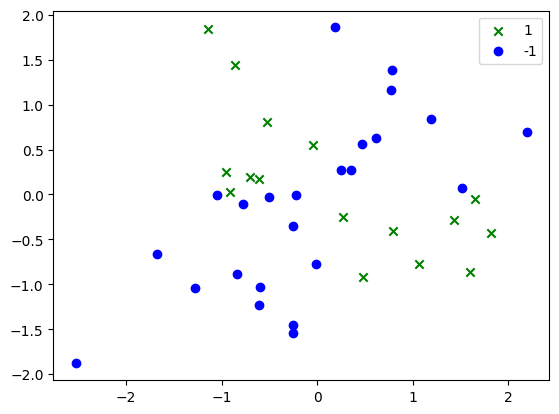

In [12]:
import numpy as np
import matplotlib.pyplot as plt
#创建数据
X_xor = np.random.randn(40,2)
y_xor = np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor = np.where(y_xor, 1, -1)
#绘制散点图
plt.scatter(x=X_xor[y_xor==1,0],  # 横坐标
		y=X_xor[y_xor==1,1],  # 纵坐标
		color='g', marker='x', label='1')
plt.scatter(x=X_xor[y_xor==-1,0],  
		y=X_xor[y_xor==-1,1],  
		color='b', marker='o', label='-1')
plt.legend() #显示图例
plt.show()


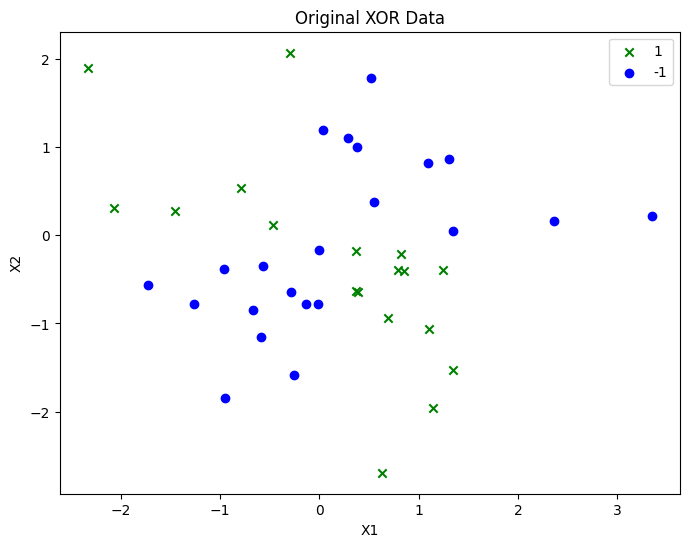

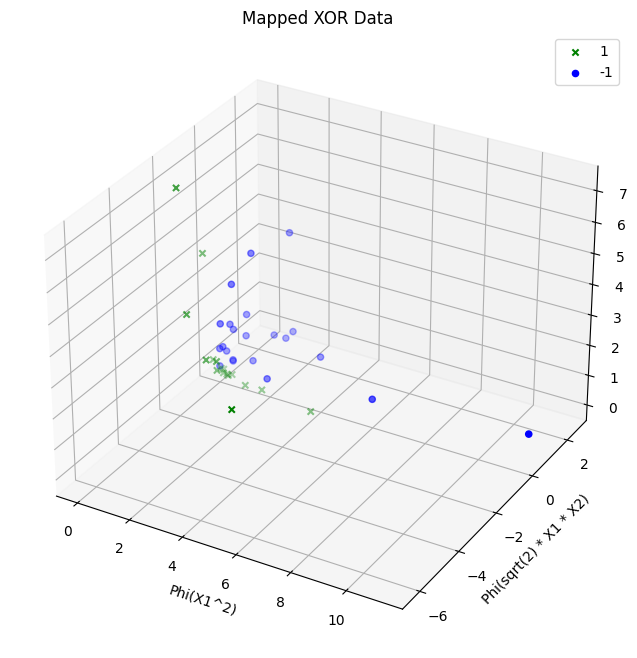

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建数据
X_xor = np.random.randn(40, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# 定义映射函数
def phi(x):
    return np.array([x[0]**2, np.sqrt(2) * x[0] * x[1], x[1]**2])

# 对数据进行映射
X_mapped = np.array([phi(x) for x in X_xor])

# 绘制原始数据的散点图
plt.figure(figsize=(8, 6))
plt.scatter(x=X_xor[y_xor == 1, 0], y=X_xor[y_xor == 1, 1], color='g', marker='x', label='1')
plt.scatter(x=X_xor[y_xor == -1, 0], y=X_xor[y_xor == -1, 1], color='b', marker='o', label='-1')
plt.title('Original XOR Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# 绘制映射后的数据的3D散点图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_mapped[y_xor == 1, 0], X_mapped[y_xor == 1, 1], X_mapped[y_xor == 1, 2], color='g', marker='x', label='1')
ax.scatter(X_mapped[y_xor == -1, 0], X_mapped[y_xor == -1, 1], X_mapped[y_xor == -1, 2], color='b', marker='o', label='-1')
ax.set_title('Mapped XOR Data')
ax.set_xlabel('Phi(X1^2)')
ax.set_ylabel('Phi(sqrt(2) * X1 * X2)')
ax.set_zlabel('Phi(X2^2)')
ax.legend()
plt.show()


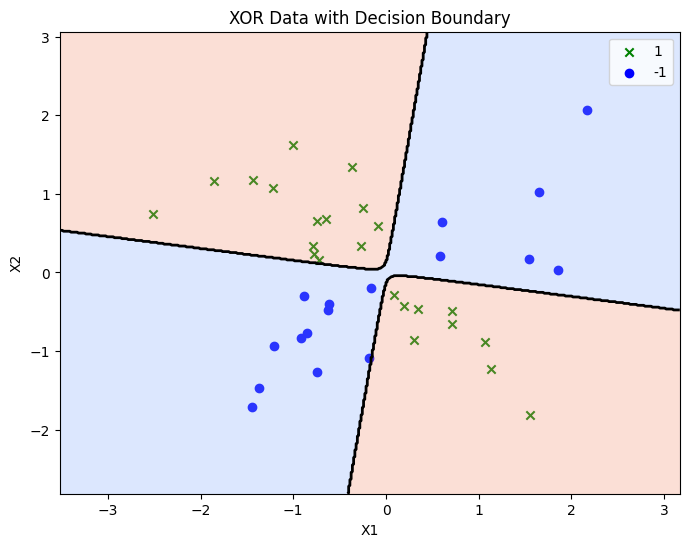

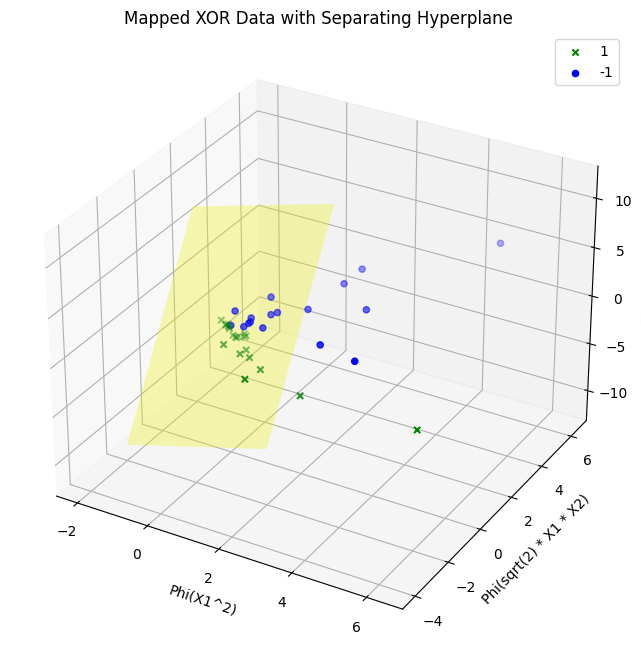

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

# 创建数据
X_xor = np.random.randn(40, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# 定义映射函数
def phi(x):
    return np.array([x[0]**2, np.sqrt(2) * x[0] * x[1], x[1]**2])

# 使用SVM和二次核训练模型
model = SVC(kernel='poly', degree=2, C=1e10)  # Hard margin: Large C
model.fit(X_xor, y_xor)

# 绘制原始数据的散点图
plt.figure(figsize=(8, 6))
plt.scatter(x=X_xor[y_xor == 1, 0], y=X_xor[y_xor == 1, 1], color='g', marker='x', label='1')
plt.scatter(x=X_xor[y_xor == -1, 0], y=X_xor[y_xor == -1, 1], color='b', marker='o', label='-1')

# 绘制决策边界
x_min, x_max = X_xor[:, 0].min() - 1, X_xor[:, 0].max() + 1
y_min, y_max = X_xor[:, 1].min() - 1, X_xor[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, levels=np.linspace(-1, 1, 3), cmap='coolwarm')
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')

plt.title('XOR Data with Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# 绘制映射后的数据的3D散点图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
X_mapped = np.array([phi(x) for x in X_xor])
ax.scatter(X_mapped[y_xor == 1, 0], X_mapped[y_xor == 1, 1], X_mapped[y_xor == 1, 2], color='g', marker='x', label='1')
ax.scatter(X_mapped[y_xor == -1, 0], X_mapped[y_xor == -1, 1], X_mapped[y_xor == -1, 2], color='b', marker='o', label='-1')

# 绘制分离超平面
coef = model.dual_coef_
intercept = model.intercept_

# Extract coefficients for plotting
w = np.zeros(3)
for i, coef_i in enumerate(coef[0]):
    w += coef_i * phi(X_xor[model.support_[i]])

x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)
Z = (-w[0] * X - w[1] * Y - intercept) / w[2]  # Using the plane equation w1*x1 + w2*x2 + w3*x3 + b = 0

ax.plot_surface(X, Y, Z, alpha=0.3, rstride=100, cstride=100, color='yellow')

ax.set_title('Mapped XOR Data with Separating Hyperplane')
ax.set_xlabel('Phi(X1^2)')
ax.set_ylabel('Phi(sqrt(2) * X1 * X2)')
ax.set_zlabel('Phi(X2^2)')
ax.legend()
plt.show()
